### Import Library yang akan digunakan

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import Sequential, layers

### menggunakan funcion dari pandas read_csv untuk membaca dataset

In [2]:
df = pd.read_csv("Star3642_balanced.csv")

### Penjelasan tiap Kolom
#### Vmag disini adalah data untuk besarnya bintang
#### Plx jarak bintang dengan bumi
#### e_Plx perkiraan selisih dari jarak asli bintang dengan bumi
#### B-V adalah indeks warna bintang semakin rendah maka semakin panas bintangnya
#### SpType adalah kolom kategorikal bintang
#### Amag nilai absolut dari besarnya bintang
#### TargetClass adalah kolom kategorikal bintang setelah menyortir kolom SpType

In [3]:
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.3+ KB


In [5]:
df = df.drop('SpType', axis=1)

### menghapus kolom SpType karena dirasa tidak perlu

In [6]:
df.isna().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
Amag           0
TargetClass    0
dtype: int64

### disini saya melakukan standarisasi untuk meminimalkan angka

In [7]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [8]:
df[['Vmag','Plx','e_Plx','B-V','Amag']] = SS.fit_transform(df[['Vmag','Plx','e_Plx','B-V','Amag']])

### untuk target label X saya menggunakan kolom Amag, dan Vmag dan y nya TargetClass
### disini saya juga melakukan train/test split

In [9]:
X = df[['Vmag','Amag']]
y = df['TargetClass']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
X_train.shape

(2913, 2)

### disini saya mengecek kolom unik pata y_test

In [12]:
np.unique(y_test)

array([0, 1], dtype=int64)

### disini saya mulai melatih model dengan metode sequential dimana input_shape nya menyesuaikan banyaknya kolom data, disini ada 2 jadi input shapenya 2
### Untuk outputnya saya menggunakan sigmoid dengan dense layer menggunakan relu
### Pada saat compile saya menggunakan optimizer 'Adam', dengan loss 'binary_crossentropy' dan metrics 'accuracy'

In [13]:
model = Sequential([
    layers.Dense(16, activation='relu',input_shape=[2]),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='Adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

### disini saya melatih model sebanyak 100 kali

In [14]:
terlatih = model.fit(X_train, y_train, epochs = 100, validation_split=0.2)

Epoch 1/100
73/73 [==============================] - 3s 15ms/step - loss: 0.4610 - accuracy: 0.7987 - val_loss: 0.3833 - val_accuracy: 0.8422
Epoch 2/100
73/73 [==============================] - 1s 11ms/step - loss: 0.4345 - accuracy: 0.8133 - val_loss: 0.3900 - val_accuracy: 0.8439
Epoch 3/100
73/73 [==============================] - 1s 12ms/step - loss: 0.4218 - accuracy: 0.8227 - val_loss: 0.3939 - val_accuracy: 0.8456
Epoch 4/100
73/73 [==============================] - 1s 11ms/step - loss: 0.4198 - accuracy: 0.8270 - val_loss: 0.4031 - val_accuracy: 0.8456
Epoch 5/100
73/73 [==============================] - 1s 11ms/step - loss: 0.4133 - accuracy: 0.8249 - val_loss: 0.4020 - val_accuracy: 0.8405
Epoch 6/100
73/73 [==============================] - 1s 11ms/step - loss: 0.4168 - accuracy: 0.8262 - val_loss: 0.3988 - val_accuracy: 0.8370
Epoch 7/100
73/73 [==============================] - 1s 11ms/step - loss: 0.4130 - accuracy: 0.8326 - val_loss: 0.3905 - val_accuracy: 0.8439
Epoch 

### setelah dilatih sebanyak 100 kali maka didapat lah kesimpulan seperti dibawah ini

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 512)               131584    
                                                                 
 dense_6 (Dense)             (None, 1024)              5

In [16]:
y_prediksi = model.predict(X_test)

23/23 [==============================] - 0s 3ms/step


In [17]:
y_prediksi

array([[1.03252590e-01],
       [1.41009778e-01],
       [9.58751440e-01],
       [2.29288533e-01],
       [6.01128876e-01],
       [9.82696712e-01],
       [1.57836318e-01],
       [2.57669926e-01],
       [1.89140201e-01],
       [1.58639416e-01],
       [1.95231423e-01],
       [9.21983540e-01],
       [9.98847842e-01],
       [2.43151277e-01],
       [7.37746119e-01],
       [8.65371227e-02],
       [2.32640043e-01],
       [8.16391766e-01],
       [1.37066782e-01],
       [2.10526377e-01],
       [3.20419163e-01],
       [2.59944946e-01],
       [1.50747746e-01],
       [9.57562447e-01],
       [1.76469520e-01],
       [8.92809212e-01],
       [8.20154488e-01],
       [2.16293097e-01],
       [1.16350785e-01],
       [8.90585601e-01],
       [7.83394158e-01],
       [2.23990560e-01],
       [6.57449663e-01],
       [1.53878585e-01],
       [1.45385027e-01],
       [8.21395218e-01],
       [2.64854372e-01],
       [9.38745797e-01],
       [9.95882273e-01],
       [1.36404246e-01],


### karena hasil arraynya masih berupa 2 dimensi dan juga angka nya masih desimal disini saya membulatkan angka angka menjadi 1 dan 0 dan mengubahnya menjadi array 1 dimensi

In [18]:
y_prediksi2 = np.where(y_prediksi > 0.5, 1,0).reshape(-1)

In [19]:
y_prediksi2

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,

### disini saya mengevaluasi model

In [20]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.8066


[0.45463091135025024, 0.806584358215332]

### Setelah mengevaluasi model maka saya mengecek akurasinya

In [21]:
accuracy_score(y_test,y_prediksi2)

0.8065843621399177

### berikut adalah grafik perbandingan accuracy dan loss dari train dan test 

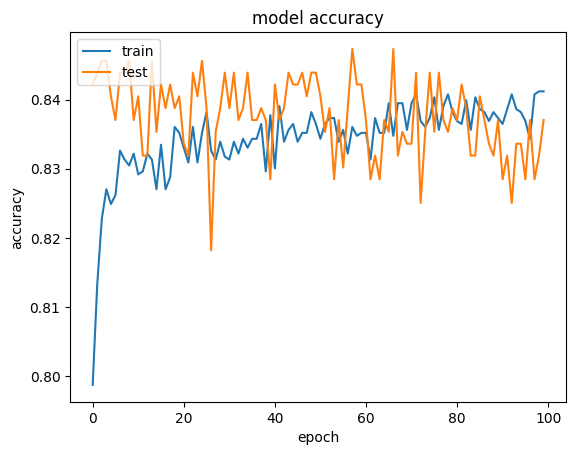

In [25]:
plt.plot(terlatih.history['accuracy'])
plt.plot(terlatih.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

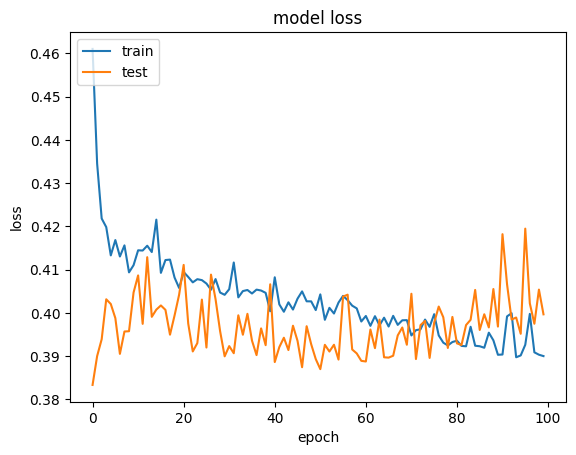

In [26]:
plt.plot(terlatih.history['loss'])
plt.plot(terlatih.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()